# WeatherPy
----

#### Observations
* 
-	Generally, the cities pulled have a high amount of humidity. A huge portion of the data was above the 60% line. There was a higher density of cities with higher humidity above the 40-degree line. You can see a similar trend when you split the cities into Northern and Southern Hemispheres. 
-	From this sample, it looks like Max Temperature drops from cities in lower Latitudes to cities in higher latitudes. However, when split into Northern and Southern Hemispheres, there is a difference. In the Southern Hemisphere the observed effect is the opposite with Temperatures increasing with Higher Latitudes. 
-	Cloudiness and Windspeed were much more spread out on their scatter plots compared to the other data types. It doesn’t look like Latitude correlates as much with either of them
.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed =[]


record_counter = 0
set_counter = 0

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    weather_query_url = query_url + city
    # Get weather data
    response = requests.get(weather_query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
  
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass
    
    time.sleep(0.5)
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | sao filipe
Processing record 2 of set 0 | kapaa
Processing record 3 of set 0 | kichera
Processing record 4 of set 0 | port elizabeth
Processing record 5 of set 0 | mataura
Processing record 6 of set 0 | diu
Processing record 7 of set 0 | east london
Processing record 8 of set 0 | ribeira grande
Processing record 9 of set 0 | svetlogorsk
Processing record 10 of set 0 | rikitea
Processing record 11 of set 0 | doctor pedro p. pena
City not found!
Processing record 12 of set 0 | dikson
Processing record 13 of set 0 | hermanus
Processing record 14 of set 0 | qaanaaq
Processing record 15 of set 0 | bambous virieux
Processing record 16 of set 0 | lufilufi
Processing record 17 of set 0 | puerto ayora
Processing record 18 of set 0 | new norfolk
Processing record 19 of set 0 | ambulu
Processing record 20 of set 0 | ancud
Processing record 21 of set 0 | yellowknife
Processing record 22 of set 0 | richards bay
Process

Processing record 36 of set 3 | kaitangata
Processing record 37 of set 3 | mnogovershinnyy
Processing record 38 of set 3 | pandan
Processing record 39 of set 3 | hobart
Processing record 40 of set 3 | metro
Processing record 41 of set 3 | huarmey
Processing record 42 of set 3 | wajima
Processing record 43 of set 3 | leningradskiy
Processing record 44 of set 3 | fort saint james
Processing record 45 of set 3 | muros
Processing record 46 of set 3 | talnakh
Processing record 47 of set 3 | sitka
Processing record 48 of set 3 | saint-philippe
Processing record 49 of set 3 | kavieng
Processing record 50 of set 3 | bilibino
Processing record 0 of set 4 | tiksi
Processing record 1 of set 4 | kuching
Processing record 2 of set 4 | dumka
Processing record 3 of set 4 | hilo
Processing record 4 of set 4 | cidreira
Processing record 5 of set 4 | hofn
Processing record 6 of set 4 | port augusta
Processing record 7 of set 4 | broome
Processing record 8 of set 4 | laguna
Processing record 9 of set 4 |

Processing record 26 of set 7 | muravlenko
Processing record 27 of set 7 | debre birhan
Processing record 28 of set 7 | sao felix do xingu
Processing record 29 of set 7 | tarko-sale
Processing record 30 of set 7 | maniitsoq
Processing record 31 of set 7 | zaysan
Processing record 32 of set 7 | caravelas
Processing record 33 of set 7 | kirovohrad
Processing record 34 of set 7 | simao
Processing record 35 of set 7 | dzhusaly
City not found!
Processing record 36 of set 7 | viedma
Processing record 37 of set 7 | grand centre
City not found!
Processing record 38 of set 7 | boueni
Processing record 39 of set 7 | bujaru
Processing record 40 of set 7 | montes claros
Processing record 41 of set 7 | sibu
Processing record 42 of set 7 | samalaeulu
City not found!
Processing record 43 of set 7 | haibowan
City not found!
Processing record 44 of set 7 | okhotsk
Processing record 45 of set 7 | tsihombe
City not found!
Processing record 46 of set 7 | paranhos
Processing record 47 of set 7 | vilhena
Pr

Processing record 13 of set 11 | ilulissat
Processing record 14 of set 11 | sompeta
Processing record 15 of set 11 | kilindoni
Processing record 16 of set 11 | eureka
Processing record 17 of set 11 | coaticook
Processing record 18 of set 11 | fevralsk
City not found!
Processing record 19 of set 11 | bambari
Processing record 20 of set 11 | mackenzie
Processing record 21 of set 11 | kankakee
Processing record 22 of set 11 | pangody
Processing record 23 of set 11 | priargunsk
Processing record 24 of set 11 | dingle
Processing record 25 of set 11 | sept-iles
Processing record 26 of set 11 | nguiu
City not found!
Processing record 27 of set 11 | bima
Processing record 28 of set 11 | flin flon
Processing record 29 of set 11 | san roque
Processing record 30 of set 11 | ust-nera
Processing record 31 of set 11 | sokoni
Processing record 32 of set 11 | rawannawi
City not found!
Processing record 33 of set 11 | kuji
Processing record 34 of set 11 | mahajanga
Processing record 35 of set 11 | mala

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df= pd.DataFrame({"City": new_cities,"Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Wind Speed":wind_speed})

weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sao filipe,11,CV,1580270242,67,14.90,-24.50,71.13,18.39
1,kapaa,1,US,1580270164,61,22.08,-159.32,78.80,3.36
2,kichera,100,RU,1580270520,67,55.94,110.10,10.02,3.60
3,port elizabeth,75,ZA,1580270130,77,-33.92,25.57,68.00,13.87
4,mataura,96,NZ,1580270073,88,-46.19,168.86,54.00,14.00


In [7]:
# Export the city weather data into a csv file
weather_df.to_csv('../output_data/cities.csv', index= False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

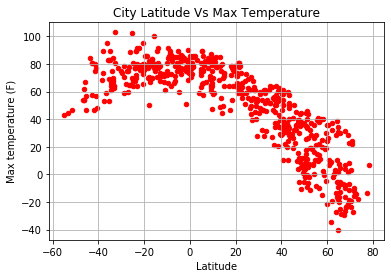

In [8]:
#Convert Date column to actual date with Datetime
weather_df["Date"] = pd.to_datetime(weather_df["Date"], unit="s")

# Latitude Vs Temperature Plot

weather_df.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

plt.savefig('../output_data/Latitude vs ')


#### Latitude vs. Humidity Plot

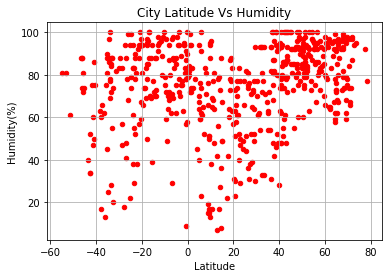

In [17]:
# Latitude Vs Humidity Plot

weather_df.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig('../output_data/Latitude vs Humidity ')

#### Latitude vs. Cloudiness Plot

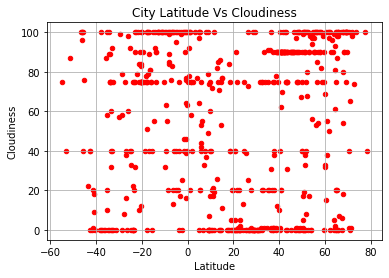

In [18]:
# Latitude Vs Cloudiness Plot

weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

plt.savefig('../output_data/Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

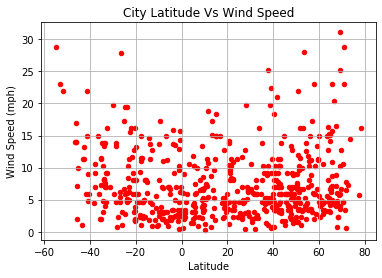

In [19]:
# Latitude Vs Windspeed Plot

weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

plt.savefig('../output_data/Latitude vs Wind Speed')

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere DataFrame
north_hemi = weather_df[weather_df['Lat'] >= 0]
# Southern Hemisphere DataFrame
south_hemi = weather_df[weather_df['Lat'] < 0]

print(north_hemi.count())
print(south_hemi.count())

City          394
Cloudiness    394
Country       394
Date          394
Humidity      394
Lat           394
Lng           394
Max Temp      394
Wind Speed    394
dtype: int64
City          193
Cloudiness    193
Country       193
Date          193
Humidity      193
Lat           193
Lng           193
Max Temp      193
Wind Speed    193
dtype: int64


In [22]:
#See Northern DF

north_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sao filipe,11,CV,2020-01-29 03:57:22,67,14.90,-24.50,71.13,18.39
1,kapaa,1,US,2020-01-29 03:56:04,61,22.08,-159.32,78.80,3.36
2,kichera,100,RU,2020-01-29 04:02:00,67,55.94,110.10,10.02,3.60
5,diu,0,IN,2020-01-29 04:02:02,63,20.71,70.98,65.89,10.47
7,ribeira grande,78,PT,2020-01-29 03:55:00,94,38.52,-28.70,60.12,19.71


In [23]:
#See Southern DF

south_hemi.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,port elizabeth,75,ZA,2020-01-29 03:55:30,77,-33.92,25.57,68.00,13.87
4,mataura,96,NZ,2020-01-29 03:54:33,88,-46.19,168.86,54.00,14.00
6,east london,0,ZA,2020-01-29 03:56:53,55,-33.02,27.91,64.40,6.93
9,rikitea,100,PF,2020-01-29 03:54:36,78,-23.12,-134.97,79.79,6.22
11,hermanus,89,ZA,2020-01-29 03:57:15,97,-34.42,19.23,64.00,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.872


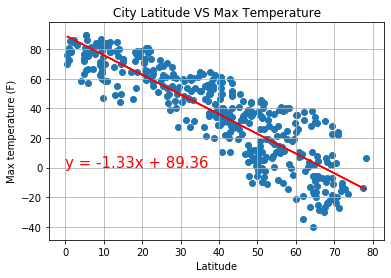

<Figure size 432x288 with 0 Axes>

In [24]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperteature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat = north_hemi.iloc[:, 5]
max_temp = north_hemi.iloc[:, 7]

#print(lat)

#print(max_temp)

correlation = st.pearsonr(lat, max_temp)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title("City Latitude VS Max Temperature")
plt.show()

plt.savefig('../output_data/Northern Latitude vs Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4282


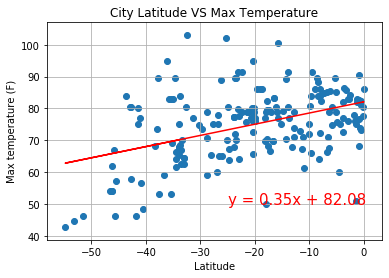

<Figure size 432x288 with 0 Axes>

In [25]:
# sSatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Max Temp', c='Red')
plt.title('City Latitude Vs Max Temperteature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat2 = south_hemi.iloc[:, 5]
max_temp2 = south_hemi.iloc[:, 7]


correlation = st.pearsonr(lat2, max_temp2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title("City Latitude VS Max Temperature")
plt.show()

plt.savefig('../output_data/Southern Latitude vs Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.4512


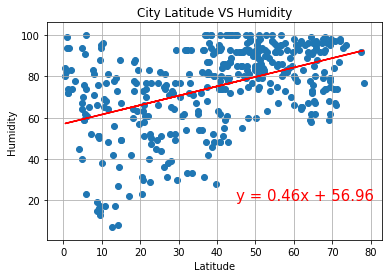

<Figure size 432x288 with 0 Axes>

In [26]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat3 = north_hemi.iloc[:, 5]
humidity = north_hemi.iloc[:, 4]

correlation = st.pearsonr(lat3, humidity)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude VS Humidity")
plt.show()

plt.savefig('../output_data/Northern Latitude vs Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.2316


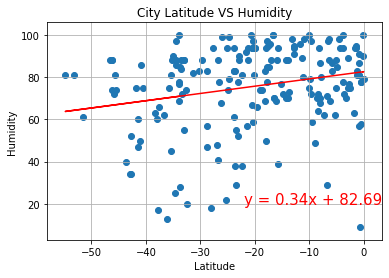

<Figure size 432x288 with 0 Axes>

In [27]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Humidity', c='Red')
plt.title('City Latitude Vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat4 = south_hemi.iloc[:, 5]
humidity2 = south_hemi.iloc[:, 4]

correlation = st.pearsonr(lat4, humidity2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude VS Humidity")
plt.show()
plt.savefig('../output_data/Southern Latitude vs Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2602


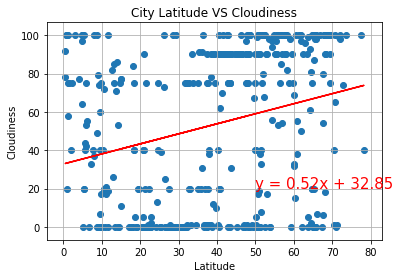

<Figure size 432x288 with 0 Axes>

In [28]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat5 = north_hemi.iloc[:, 5]
cloudiness = north_hemi.iloc[:, 1]

correlation = st.pearsonr(lat5, cloudiness)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude VS Cloudiness")
plt.show()
plt.savefig('../output_data/Northern Latitude vs Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2543


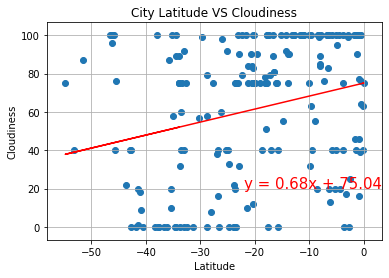

<Figure size 432x288 with 0 Axes>

In [29]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Cloudiness', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat6 = south_hemi.iloc[:, 5]
cloudiness2 = south_hemi.iloc[:, 1]

correlation = st.pearsonr(lat6, cloudiness2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude VS Cloudiness")
plt.show()
plt.savefig('../output_data/Southern Latitude vs Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.168


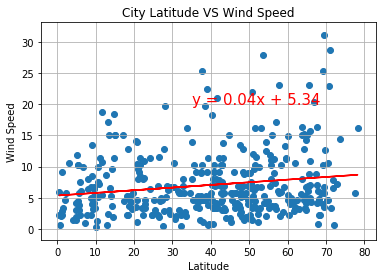

In [33]:
# Scatter Plot

north_hemi.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Windspeed)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat7 = north_hemi.iloc[:, 5]
windspeed = north_hemi.iloc[:, 8]

correlation = st.pearsonr(lat7, windspeed)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude VS Wind Speed")
plt.show()
plt.savefig('../output_data/Northern Latitude vs Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.3545


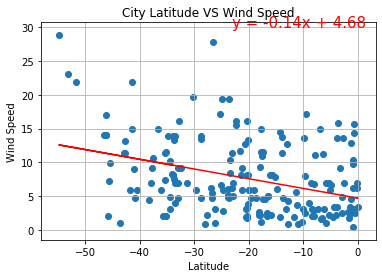

<Figure size 432x288 with 0 Axes>

In [31]:
# Scatter Plot

south_hemi.plot(kind='scatter', x='Lat', y='Wind Speed', c='Red')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Windspeed)')
plt.grid()



#compute the Pearson correlation coefficient between Temp and Lat
lat8 = south_hemi.iloc[:, 5]
windspeed2 = south_hemi.iloc[:, 8]

correlation = st.pearsonr(lat8, windspeed2)

print(f"The r-squared is {round(correlation[0],4)}")


# Create Linear Regression

x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitude VS Wind Speed")
plt.show()
plt.savefig('../output_data/Southern Latitude vs Wind Speed')